# Multi-Taxi Environment Demonstration
## In the followin example we will demonstrate:
1. Setting up the environment, and general view of the map.
2. The different formats of observations.
3. Doc the adjustable parameters.
4. Show how to change the reward table.

In [1]:
# installing easily via pip
!pip install MultiTaxiLib==0.1.0

  Using cached ray-1.10.0-cp37-cp37m-manylinux2014_x86_64.whl (59.6 MB)
  Using cached gym-0.22.0-py3-none-any.whl
  Using cached numpy-1.21.5-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Using cached gym_notices-0.0.4-py3-none-any.whl (2.7 kB)
  Using cached cloudpickle-2.0.0-py3-none-any.whl (25 kB)
  Using cached PyYAML-6.0-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (596 kB)
  Using cached filelock-3.6.0-py3-none-any.whl (10.0 kB)
  Using cached protobuf-3.19.4-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Using cached grpcio-1.44.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.3 MB)
  Using cached msgpack-1.0.3-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (299 kB)
  Using cached click-8.0.4-py3-none-any.whl (97 kB)
  Using cached redis-4.1.4-py3-none-any.whl (175 kB)
  Using cached Deprecated-1.2.13-py2.py3-none-any.whl (9.6 kB)
  Using cached wrapt-1.13

In [2]:
from MultiTaxiLib.taxi_environment import TaxiEnv
import matplotlib.pyplot as plt

In [3]:
env_instance = TaxiEnv(num_taxis=3, num_passengers=2)
env_instance.render()

+-----------------------+
|X: |F: | : | : | : |F:X|
| : | : : :_| : | : | : |
| : : : : : : : : : : : |
| : : : : : | : : : :_: |
| : : : : : | : : : : :_|
| : : : : : : : : : : : |
|X| :G| | | :G| | | : |X|
+-----------------------+
Taxi1-YELLOW: Fuel: 0, Location: (1,5), Collided: False
Taxi2-RED: Fuel: 0, Location: (3,10), Collided: False
Taxi3-WHITE: Fuel: 0, Location: (4,11), Collided: False
Passenger1: Location: (1, 2), Destination: (1, 5)
Passenger2: Location: (4, 2), Destination: (4, 10)
Done: False, {'taxi_1': False, 'taxi_2': False, 'taxi_3': False, '__all__': False}
Passengers Status's: [2, 2]


### Observations
The observations returned as a dictionary with the keys being "taxi_{i}", such that each item is the observation of agent "i", starting with i=1.

An observation could be either an image, which is a window of sight for the agent, or a sybolic vector consists of: <code>[
            taxi_row, taxi_col, taxi_fuel, 
            passenger1_row, passenger1_col... passenger_n_row, passenger_n_col,
            passenger1_dest_row, passenger1_dest_col... passenger_n_dest_row, passenger_n_dest_col,
            passenger1_status... passenger_n_status
        ]</code>

Symbolic Vector Observation no others:
[3 0 0 4 6 4 8 2]
Symbolic Vector Observation with others:
[ 6  9  1  6  0  0  5  2 11  2]
Image Observation:


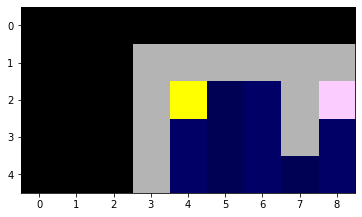

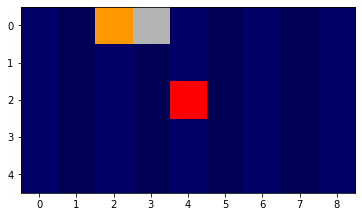

In [4]:
env_instance_image_obs = TaxiEnv(num_taxis=2, observation_type='image')
env_instance_symbolic_obs_no_others = TaxiEnv(num_taxis=2, observation_type='symbolic', can_see_others=False)
env_instance_symbolic_obs_with_others = TaxiEnv(num_taxis=2, observation_type='symbolic', can_see_others=True)

print(f"Symbolic Vector Observation no others:\n{env_instance_symbolic_obs_no_others.reset()['taxi_1']}")
print(f"Symbolic Vector Observation with others:\n{env_instance_symbolic_obs_with_others.reset()['taxi_1']}")
print("Image Observation:")
plt.imshow(env_instance_image_obs.reset()['taxi_1'])
plt.show()
plt.imshow(env_instance_image_obs.reset()['taxi_2'])
plt.show()

__Note:__ In image observations, fuel and gas station will have distinct colors (pink and purple), and passengers current locations and destinations will have close colors by values.

__Also, note:__ In symbolic observations, we can choose wether taxis are aware of each other via the hyper parameter <code>can_see_others</code>.

### Environment's Parameters
1. <code>num_taxis</code> - the number of taxis operating in the envorinment. _default=1_.
2. <code>num_passengers</code> - the number of passengers to drive in the envorinment. _default=1_.
3. <code>max_fuel</code> - if <code>None</code> - each taxi has unlimited fuel to spent, else, this is the amount of fuel in a full-tank, and this amount decreases by 1 in each timestep unless taxis fill their tank at the station with a special action._default=<code>None</code>_.
4. <code>domain_map</code> - array of chars, representing the environment map with special characters for taxis initilized spots and fuel stations. _default=pre-defined map_.
5. <code>taxis_capacity</code> - a list of integers, where the i'th element represents the i'th taxi's passengers limit, where <code>None</code> represents unlimitted capacity. _default=None_.
6. <code>collision_sensitive_domain</code> - if <code>True</code> - taxis that move to the same grid point in the map - collide and stop their operation, otherwise, there can be multiple taxis at the same grid point. _default=False_.
7. <code>fuel_type_list</code> - a list of either 'F' or 'G', where each element represents the fuel type of each taxi (F for *F*uel and G for *G*as), if <code>None</code> - all are fuel. _default=None_.
8. <code>option_to_stand_by</code> - if <code>True</code> - taxis have the option to take *no_action*. _default=False_.
9. <code>view_len</code> - relevant for image observations, defines the size of the window of sight of the taxis' observations, _default=2_.
10. <code>rewards_table</code> - a dictionary that defines changes in the original reward table, see description below, _default=default_reward_table_.
11. <code>observation_type</code> - either 'symbolic' or 'image', indicating the type of observations to the taxis, _default='symbolic'.
12. <code>can_see_others</code> - If <code>True</code> and in symbolic observations mode, taxis will have other taxis' locations in their observations. _default=<code>False</code>,_. Note that in image oservations taxis can always see each other.

### Changing the Reward Table

The default reward table is:
<code>
    dict(
    step=-1,  # default reward for each timestep.
    no_fuel=-1,  # for reaching "no fuel" state.
    bad_pickup=-1,  # for pickup an empty cell or tries to pickup passenger when reached its capacity.
    bad_dropoff=-1,  # for dropping off passenger in farther point than it was before.
    bad_refuel=-1,  # for trying to fuel outside the fuel station.
    pickup=-1,  # for picking up.
    standby_engine_off=-1,  # for standing by with an off engine.
    turn_engine_on=-1,  # for turning engine on.
    turn_engine_off=-1,  # for turning engine off.
    standby_engine_on=-1,  # for standing by with engine on.
    intermediate_dropoff=2,  # for getting passenger closer to its destination.
    final_dropoff=100,  # for dropping passenger in its destination.
    hit_wall=-1,  # for hitting a wall.
    collision=-1, # for performing a collision, this is given in the collision timestep.
    collided=-1,  # for being in a collided status, this is given in the timesteps after the collision.
)</code>

Note that it is intended to be very elaborate. In the default version, the taxis get <code>-1</code> for default actions and "time that goes by", and this apply for many scenarios, s.t bad_pickup, standby, step...

We can use this elaboration in our advantage for customizing this dictionary (or only the parts of it that we would like to change, and then initialize an environment with our reward table of interest.

#### In the next example we'll initialize an environment where we speciall penalize taxis for making <code>bad_pickup</code> tries, all other rewards are the same.

In [5]:
customized_reward = dict(bad_pickup=-50)
env_instance_image_obs = TaxiEnv(rewards_table=customized_reward)

### For your convenience, we are also adding a simple example on training RLLib agents (PPO in this case) in our environment

In [6]:
# need torch for this cell, simply run:
# !pip install torch
import random

import ray
from ray import tune
from ray.rllib.examples.models.shared_weights_model import TorchSharedWeightsModel

from ray.rllib.models import ModelCatalog
from ray.rllib.policy.policy import PolicySpec
from ray.rllib.utils.test_utils import check_learning_achieved

ray.init(ignore_reinit_error=True, local_mode=True)

# Register the models to use.
mod1 = mod2 = TorchSharedWeightsModel
ModelCatalog.register_custom_model("model1", mod1)
ModelCatalog.register_custom_model("model2", mod2)

num_policies = 2
num_agents = 2

# Each policy can have a different configuration (including custom model).
def gen_policy(i):
    config = {
        "model": {
            "custom_model": ["model1", "model2"][i % 2],
        },
        "gamma": random.choice([0.95, 0.99]),
    }
    return PolicySpec(config=config)

# Setup PPO with an ensemble of `num_policies` different policies.
policies = {"taxi_{}".format(i + 1): gen_policy(i) for i in range(num_policies)}
policy_ids = list(policies.keys())

def policy_mapping_fn(agent_id, episode, worker, **kwargs):
    return agent_id

config = {
    "env": TaxiEnv,
    "env_config": {
        "taxis_number": num_agents,
        "can_see_others": True
    },
    "num_gpus": 0,
    "horizon": 200,  # This is relevant because our env is episodic.
    "multiagent": {
        "policies": policies,
        "policy_mapping_fn": policy_mapping_fn,
    },
    "framework": "torch",
}
stop = {
#     "episode_reward_mean": 10,
    "timesteps_total": 1000,
}

results = tune.run("PPO", stop=stop, config=config, verbose=0)
# check_learning_achieved(results, 10)
ray.shutdown()

E0225 21:16:40.035361153    5311 fork_posix.cc:70]           Fork support is only compatible with the epoll1 and poll polling strategies
E0225 21:16:40.066989338    5311 fork_posix.cc:70]           Fork support is only compatible with the epoll1 and poll polling strategies
E0225 21:16:40.084590227    5311 fork_posix.cc:70]           Fork support is only compatible with the epoll1 and poll polling strategies
E0225 21:16:41.420966163    5311 fork_posix.cc:70]           Fork support is only compatible with the epoll1 and poll polling strategies
2022-02-25 21:16:41,620	WARNING worker.py:513 -- `ray.get_gpu_ids()` will always return the empty list when called from the driver. This is because Ray does not manage GPU allocations to the driver process.
:task_name:bundle_reservation_check_func
:actor_name:PPOTrainer
2022-02-25 21:16:41,712	INFO ppo.py:250 -- In multi-agent mode, policies will be optimized sequentially by the multi-GPU optimizer. Consider setting simple_optimizer=True if this do

:task_name:bundle_reservation_check_func
:actor_name:PPOTrainer
:actor_name:RolloutWorker
:actor_name:RolloutWorker


:actor_name:RolloutWorker
2022-02-25 21:16:41,927	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2022-02-25 21:16:48,000	WARNING ppo.py:127 -- No data for taxi_2, not updating kl


### And just like that! We are good to go!

### After initializing the environemnt you can deploy to it any planner/ RL/ MARL algorithms that you like and works with gym.

# Enjoy!